# Cargar Datos

In [18]:
import pandas as pd

# Ruta al archivo
ruta = 'dataset/stocks/TWTR.csv'

# Cargar el dataset
df = pd.read_csv(ruta)

# Convertir la columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna de fecha como índice
df.set_index('Date', inplace=True)

# Establecer la frecuencia del índice
df = df.asfreq('ME') # D: Diario, ME: Mensual, YE: Anual

# Comprobar valores nulos
print(df.isnull().sum())

# Rellenar valores nulos si existen (interpolación)
if df.isnull().sum().sum() > 0:
    df.interpolate(method='linear', inplace=True) # linear, pchip...

    # Visualizar valores nulos
    print(df.isnull().sum())

# Visualizar el dataset
print(df.head())

Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2013-11-30        NaN        NaN        NaN        NaN        NaN         NaN
2013-12-31  62.360001  65.220001  61.650002  63.650002  63.650002  27814600.0
2014-01-31  63.389999  65.370003  62.650002  64.500000  64.500000  15498800.0
2014-02-28  55.930000  56.000000  54.130001  54.910000  54.910000   8137200.0
2014-03-31  47.549999  47.750000  46.430000  46.669998  46.669998   5794500.0


In [19]:
print(df.describe())

            Open       High        Low      Close  Adj Close        Volume
count  76.000000  76.000000  76.000000  76.000000  76.000000  7.600000e+01
mean   30.862829  31.571184  30.451053  31.036579  31.036579  2.305268e+07
std    11.542200  11.797719  11.379369  11.598960  11.598960  1.038382e+07
min    14.930000  15.060000  14.910000  14.950000  14.950000  5.794500e+06
25%    19.830000  20.593750  19.641250  20.237500  20.237500  1.741258e+07
50%    30.907500  31.585000  30.207500  31.047500  31.047500  2.140350e+07
75%    38.946250  39.687500  38.423750  38.962500  38.962500  2.787325e+07
max    63.389999  65.370003  62.650002  64.500000  64.500000  6.439220e+07


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2013-11-30 to 2020-03-31
Freq: ME
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       76 non-null     float64
 1   High       76 non-null     float64
 2   Low        76 non-null     float64
 3   Close      76 non-null     float64
 4   Adj Close  76 non-null     float64
 5   Volume     76 non-null     float64
dtypes: float64(6)
memory usage: 4.2 KB
None


# Visualización

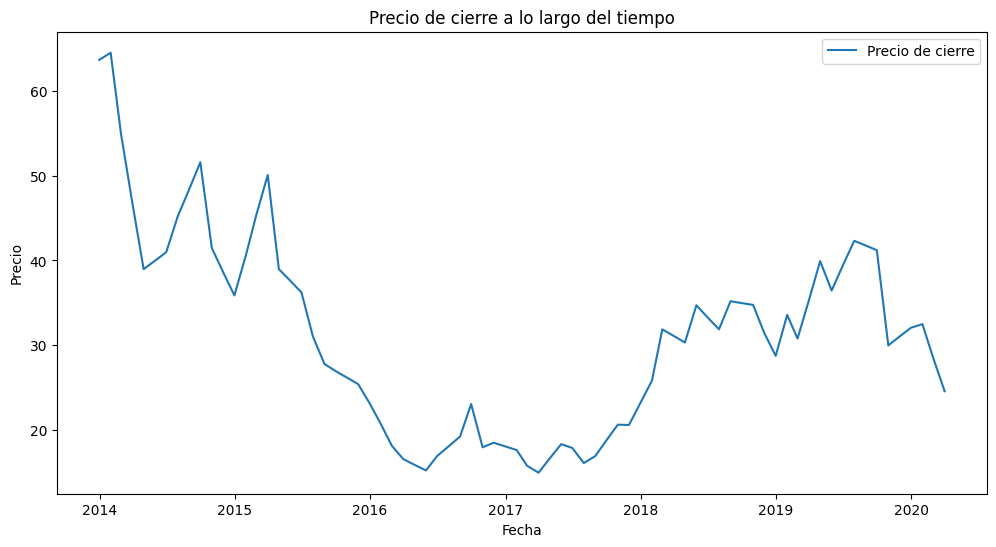

In [2]:
import matplotlib.pyplot as plt

# Graficar el precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Estacionariedad

In [25]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller
result = adfuller(df['Close'].dropna())
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

if result[1] <= 0.05:
    print('La serie es estacionaria')
elif result[0] > result[4]['5%']:
    print('La serie es no estacionaria')
else:
    print('La serie no es estacionaria')

Estadístico ADF: -2.89590835474917
Valor p: 0.0458258732221585
Valores críticos: {'1%': -3.520713130074074, '5%': -2.9009249540740742, '10%': -2.5877813777777776}
La serie es estacionaria


# Estacionalidad

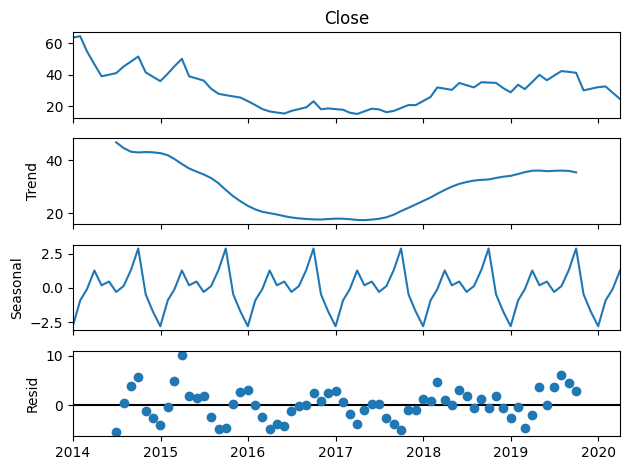

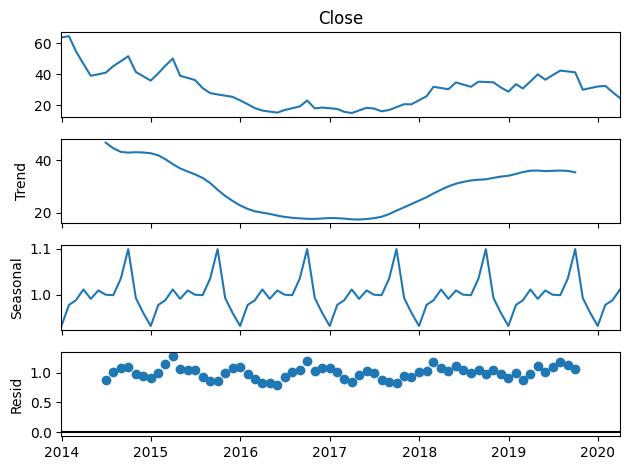

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
result = seasonal_decompose(df['Close'].dropna(), model='additive')
result.plot()
plt.show()

result = seasonal_decompose(df['Close'].dropna(), model='multiplicative')
result.plot()
plt.show()

# Autocorrelación

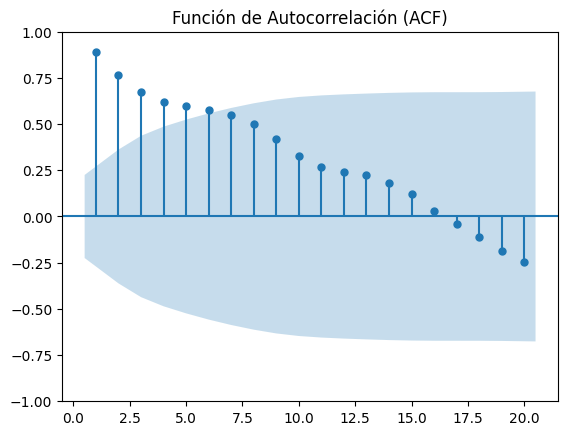

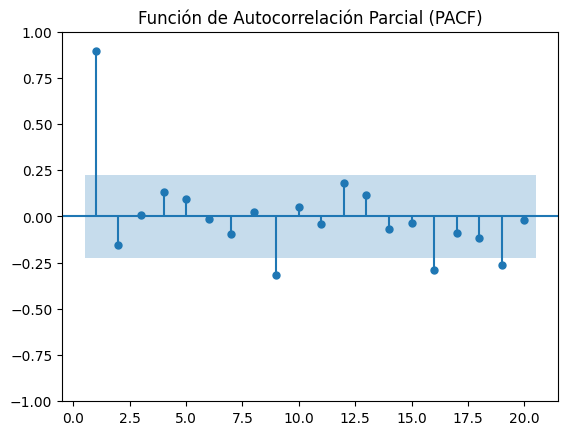

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = df['Close'].dropna()

# Graficar ACF
plot_acf(data, lags=20, zero=False)
plt.title('Función de Autocorrelación (ACF)')
plt.show()

# Graficar PACF
plot_pacf(data, lags=20, zero=False, method='ols')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()